In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
from pltconfig import *

In [2]:
# Read in the data and print summary stats
ph_df = pd.read_csv('data/fig4/082420_endpoint_pH_measurement.csv')
ph_df.groupby(['short_name', 'condition']).mean()

OD600       pH
short_name                 condition                   
CAfree:pFE-sfGFP+pFA-HCAII 10% CO2    2.287500  6.28500
                           ambient    2.415000  6.25500
CCMB1:p1A+pFA-sfGFP        10% CO2    2.698750  6.33000
                           ambient    0.041250  7.01250
CCMB1:pCB'+pCCM'           10% CO2    2.731875  6.45750
                           ambient    2.928125  6.60375

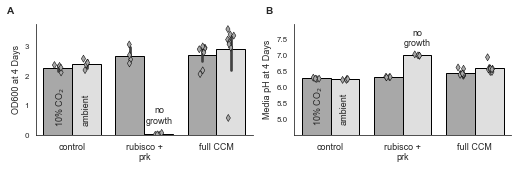

In [3]:
# Figure 4 - supplement 2. Left panel is endpoint ODs, right is endpoint pH. 
# Media pH was measured in technical qudescribeuplicate prior to the experiment and was 7.01
xorder = ['CAfree:pFE-sfGFP+pFA-HCAII', 'CCMB1:p1A+pFA-sfGFP', "CCMB1:pCB'+pCCM'", ]
xticks = ['control', 'rubisco +\nprk', "full CCM"]
hue_order = ['10% CO2', 'ambient']

pal = {'10% CO2': greys[3],
       'ambient': greys[1]}
strip_pal = {'10% CO2': greys[3],
             'ambient': greys[3]}

fig, axs = plt.subplots(figsize=(7.25, 2.5), ncols=2)
sns.set_style('white')
plt.sca(axs[0])
sns.barplot(data=ph_df, x='short_name', y='OD600', hue='condition', order=xorder,
            hue_order=hue_order, palette=pal, edgecolor='k')
sns.stripplot(data=ph_df, x='short_name', y='OD600', hue='condition', order=xorder,
              hue_order=hue_order, dodge=0.5, marker='d',
              edgecolor='k', linewidth=0.5, palette=strip_pal)
plt.text(-0.25, 0.4, "10% CO$_2$", fontsize=9, rotation=90, ha="left")
plt.text(0.25, 0.4, "ambient", fontsize=9, rotation=90, ha="right")
plt.text(1.21, 0.4, "no\ngrowth", fontsize=9, ha="center")

plt.legend().set_visible(False)
plt.xticks(np.arange(3), xticks, fontsize=9)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.ylabel('OD600 at 4 Days', fontsize=9)
sns.despine()

plt.sca(axs[1])
sns.barplot(data=ph_df, x='short_name', y='pH', hue='condition', order=xorder,
            hue_order=hue_order, palette=pal, edgecolor='k')
sns.stripplot(data=ph_df, x='short_name', y='pH', hue='condition', order=xorder,
              hue_order=hue_order, dodge=0.5, marker='d',
              edgecolor='k', linewidth=0.5, palette=strip_pal)
plt.text(-0.25, 4.9, "10% CO$_2$", fontsize=9, rotation=90, ha="left")
plt.text(0.25, 4.9, "ambient", fontsize=9, rotation=90, ha="right")
plt.text(1.2, 7.3, "no\ngrowth", fontsize=9, ha="center")

plt.legend().set_visible(False)
plt.xticks(np.arange(3), xticks, fontsize=9)
plt.xlabel('')
plt.ylabel('Media pH at 4 Days', fontsize=9)
plt.yticks(np.arange(5,8,0.5), fontsize=8)
plt.ylim(4.5, 8)
sns.despine()

for l, ax in zip('AB', axs):
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
          fontsize=10, fontweight='bold', va='top', ha='right')
plt.tight_layout()

plt.savefig('fig4/fig4S2.png', dpi=300)
plt.show()
